# 넷플릭스 주가 데이터 분석
- 캐글을 활용하여 데이터를 다운로드 받아 활용합니다.
  - 데이터셋 : https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction
  - 데이터셋 요약 : 2018-02-05 ~ 2022-02-04까지의 일별 데이터

- 명시된 요구사항 이외에는 자유롭게 작성해도 무관

## A. 데이터 전처리
- 데이터 읽어오기
  - Pandas를 사용해 csv 파일(NLFX.csv)을 DataFrame으로 읽어오기
  - 이 때, ['Data', 'Open', 'High', 'Lows', 'Close'] 필드만 읽어오도록 구성

In [1]:
! pip install pandas

You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
! pip install numpy

You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
! pip install matplotlib

You should consider upgrading via the 'C:\Users\SSAFY\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nflx = pd.read_csv("archive/NFLX.csv")
nflx = nflx[['Date', 'Open', 'High', 'Low', 'Close']]
nflx

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## B. 데이터 전처리
- 2021 이후의 종가 데이터 출력하기

  - csv 파일 DataFrame으로 읽어와 2021년 이후의 데이터만 필터링하기
    - [힌트] 필터링이 가능한 형식으로 데이터 타입을 변경한 후 필터링 진행
    - pandas의 to_datetime() 활용
  - 필터링이 완료된 DataFrame의 종가 데이터를 Matplotlib를 사용해 시각화하기


In [83]:
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.5+ KB


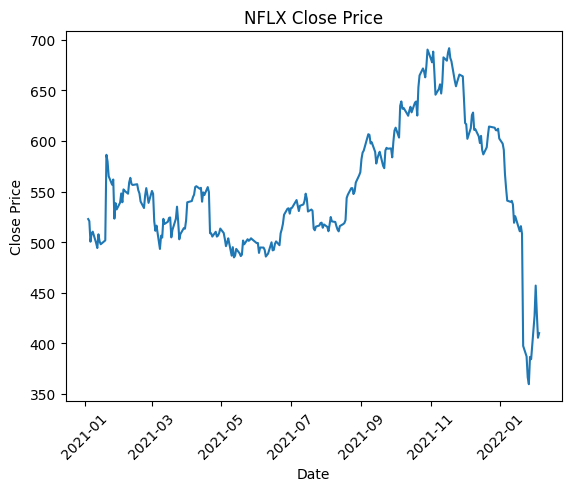

In [18]:
# 날짜 데이터 변환
nflx["Date"] = pd.to_datetime(nflx["Date"])

# 2021년 이후 데이터만 필터링하기
nflx["Year"] = nflx['Date'].dt.year  # 연도 추출
nflx = nflx[nflx['Year']>=2021]
nflx.head()


# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(nflx['Date'], nflx['Close'])


# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)  # x축 글자 기울이기

# y축 레이블 설정
plt.ylabel('Close Price')

# 그래프 표시
plt.show()

## C. 데이터 분석
- 2021 이후 최고, 최저가 출력하기
  - csv 파일을 DataFrame으로 읽어와 2021년 이후의 데이터만 필터링하기
  - 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가 출력
  - Pandas의 내장 함수 사용
  - 출력 결과 예시  
      ```python
      print("최고 종가: ", max_price)
      print("최저 종가: ", min_price)
      ```




In [21]:
max_price = max(nflx['Close'])
min_price = min(nflx['Close'])

print("최고 종가: ", max_price)
print("최저 종가: ", min_price)

최고 종가:  691.690002
최저 종가:  359.700012


## D. 데이터 분석
- 2021 이후 월 별 평균 종가 출력하기
  - csv 파일을 DataFrame으로 읽어와 2021년 이후의 데이터만 필터링
  - 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame을 만들어 그래프로 시각화하기

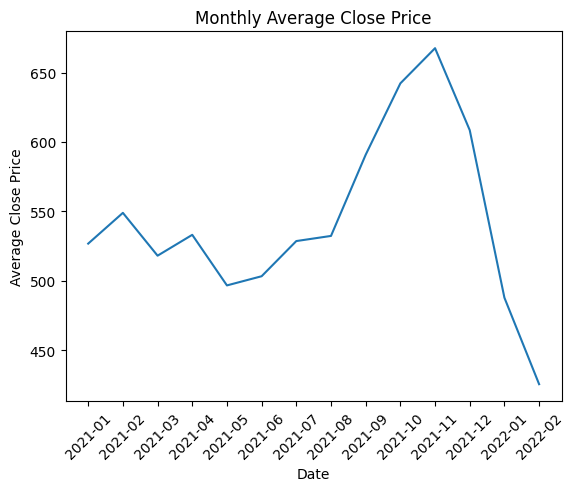

In [73]:
nflx['Year_Month'] = nflx['Date'].dt.strftime('%Y-%m')
nflx_group = nflx.groupby(nflx['Year_Month'])['Close'].mean()
nflx_group

average_nflx = nflx_group.reset_index()
average_nflx.columns = ['Year_Month', 'Average_ym']
average_nflx

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(average_nflx['Year_Month'], average_nflx['Average_ym'])


# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)  # x축 글자 기울이기

# y축 레이블 설정
plt.ylabel('Average Close Price')

# 그래프 표시
plt.show()


## E. 데이터 시각화
- 2022년 1월 이후 월 별 최고, 최저, 종가 시각화
  - csv 파일을 DataFrame으로 읽어와 2022년 이후의 데이터만 필터링
  - Matplotlib을 활용해 3가지 필드 한 번에 분석할 수 있도록 시각화하기

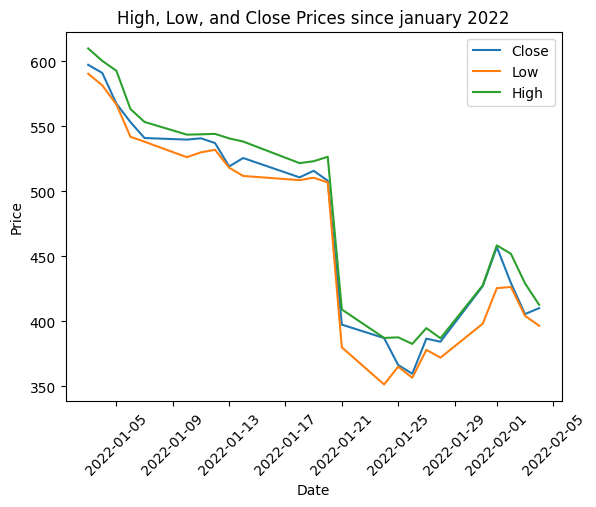

In [77]:
nflx = nflx[nflx['Year']>=2022]

# 그래프 그리기
plt.plot(nflx['Date'], nflx['Close'], label='Close')
plt.plot(nflx['Date'], nflx['Low'], label='Low')
plt.plot(nflx['Date'], nflx['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low, and Close Prices since january 2022')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)  # x축 글자 기울이기

# y축 레이블 설정
plt.ylabel('Price')

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()



## F. 생성형 AI를 활용하여 주가 예측하기
- 주가를 예측하도록 프롬프트 구성
- 생성형 AI와 나눈 대화와 결과 캡처 후 제출

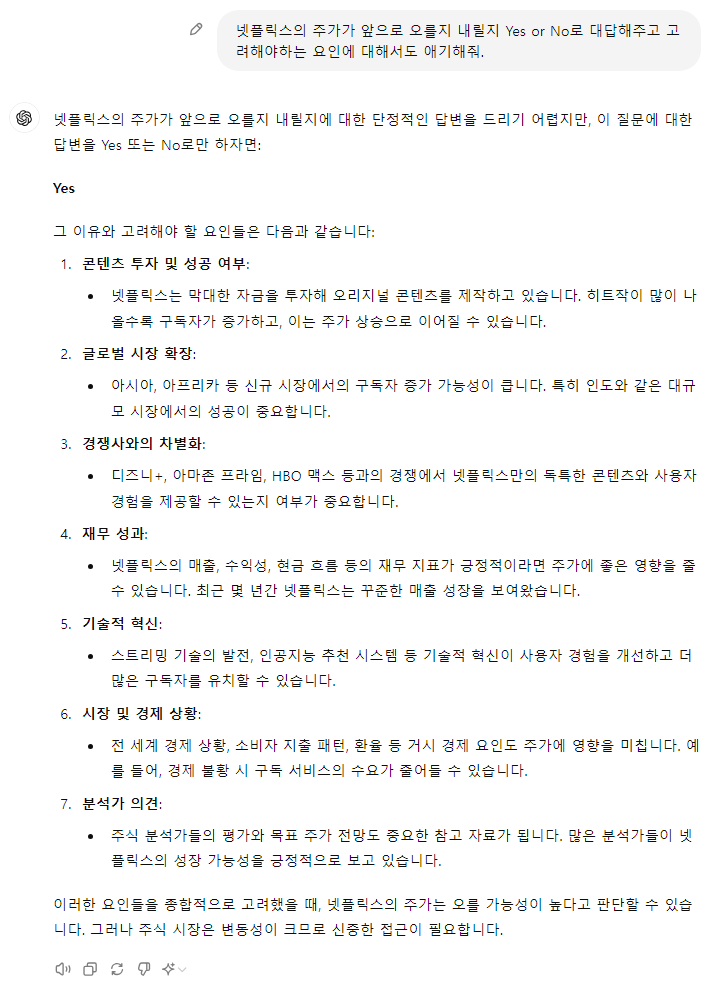